# Digital House - Trabajo Práctico Nº1
## Desafío 1. Análisis exploratorio de un dataset de precios de propiedades
Grupo Nª2
Alumnos:
* Alberto Paparelli
* André Song
* Marianela Riz
* Gloria Caravajal
* Franco Emanuel Rodriguez
* Iván Axel Schweizer

Objetivos:
* Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
* Realizar un análisis descriptivo de las principales variables.
* Crear nuevas columnas a partir de las características dadas que puedan tener valor
predictivo.

In [28]:
# Lo primero que hacemos es importar todas las librerias necesarias.
import pandas as pd
import numpy as np
import seaborn as sns


In [21]:
# Abrimos el dataset y hacemos un chequeo rápido para saber cantidad de registros y miramos la composición del mismo.
filename = "../dataset/properati.csv"
#data = pd.read_csv(filename, on_bad_lines='skip')
data = pd.read_csv(filename)
display(data.sample(n=6))
#data.head() 
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
89984,89984,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,NaN,...,67.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1b9fj_venta_depart...,BBU5754 AP390930,Departamento - Palermo Soho,https://thumbs4.properati.com/1/gRMVkesjF5WiTF...
69664,69664,sell,apartment,San Carlos de Bariloche,|Argentina|Río Negro|San Carlos de Bariloche|S...,Argentina,Río Negro,3837856.0,NaN,NaN,...,119.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1aii9_venta_depart...,"Departamento, San Carlos de Bariloche, San Car...",departamento Arelauquen,https://thumbs4.properati.com/4/HJ7PK_B81fvvZV...
79631,79631,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1avsm_venta_depart...,"Departamento con Ventanas de aluminio, Córdoba...",Departamento - General Paz,NaN
19714,19714,sell,apartment,San Cristobal,|Argentina|Capital Federal|San Cristobal|,Argentina,Capital Federal,3429153.0,"-34.620735,-58.40756",-34.620735,...,30.0,NaN,1960.00000,1.0,1.0,NaN,http://www.properati.com.ar/17ai2_venta_depart...,Corredor Responsable: Luis Varela - CSI 5527 /...,1 AMBIENTE CON BALCON Y COCINA INDEPENDIENTE,https://thumbs4.properati.com/9/rqUQkpW8O5TQDk...
112622,112622,sell,apartment,Villa Luro,|Argentina|Capital Federal|Villa Luro|,Argentina,Capital Federal,3427407.0,"-34.6428531851,-58.4938625003",-34.642853,...,51.0,2107.142857,2313.72549,NaN,NaN,1200.0,http://www.properati.com.ar/1c75f_venta_depart...,Venta departamento de 2 ambientes con Balcón T...,Departamento - Villa Luro,https://thumbs4.properati.com/3/41kkY6i7F2z03b...
73157,73157,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.5946892803,-58.3959620116",-34.594689,...,NaN,3300.000000,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1and1_venta_depart...,Semi piso a la Vta Barrio Norte !!!!. Ayacucho...,Departamento - Barrio Norte,https://thumbs4.properati.com/8/McbpMfi5GR9-vY...


(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [23]:
data['property_type'].value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

In [24]:
for column in data.columns:
    print (f"Informacion de la columna {column}:")
    display (data[column].describe())
    print ("\n")

Informacion de la columna Unnamed: 0:


count    121220.000000
mean      60609.500000
std       34993.344153
min           0.000000
25%       30304.750000
50%       60609.500000
75%       90914.250000
max      121219.000000
Name: Unnamed: 0, dtype: float64



Informacion de la columna operation:


count     121220
unique         1
top         sell
freq      121220
Name: operation, dtype: object



Informacion de la columna property_type:


count        121220
unique            4
top       apartment
freq          71065
Name: property_type, dtype: object



Informacion de la columna place_name:


count      121197
unique       1060
top       Córdoba
freq         9254
Name: place_name, dtype: object



Informacion de la columna place_with_parent_names:


count                           121220
unique                            1164
top       |Argentina|Santa Fe|Rosario|
freq                              8504
Name: place_with_parent_names, dtype: object



Informacion de la columna country_name:


count        121220
unique            1
top       Argentina
freq         121220
Name: country_name, dtype: object



Informacion de la columna state_name:


count              121220
unique                 28
top       Capital Federal
freq                32316
Name: state_name, dtype: object



Informacion de la columna geonames_id:


count    1.025030e+05
mean     3.574442e+06
std      3.541306e+05
min      3.427208e+06
25%      3.430234e+06
50%      3.433910e+06
75%      3.836668e+06
max      6.948895e+06
Name: geonames_id, dtype: float64



Informacion de la columna lat-lon:


count                       69670
unique                      47203
top       -34.4026444,-58.6684776
freq                          312
Name: lat-lon, dtype: object



Informacion de la columna lat:


count    69670.000000
mean       -34.626210
std          1.980936
min        -54.823985
25%        -34.669065
50%        -34.597985
75%        -34.441299
max          4.545843
Name: lat, dtype: float64



Informacion de la columna lon:


count    69670.000000
mean       -59.266290
std          2.299922
min        -75.678931
25%        -58.727040
50%        -58.480128
75%        -58.395908
max        -53.733330
Name: lon, dtype: float64



Informacion de la columna price:


count    1.008100e+05
mean     4.685259e+05
std      2.260101e+06
min      0.000000e+00
25%      1.100000e+05
50%      1.850000e+05
75%      4.200000e+05
max      6.500000e+08
Name: price, dtype: float64



Informacion de la columna currency:


count     100809
unique         4
top          USD
freq       87587
Name: currency, dtype: object



Informacion de la columna price_aprox_local_currency:


count    1.008100e+05
mean     4.229397e+06
std      6.904714e+06
min      0.000000e+00
25%      1.583309e+06
50%      2.558452e+06
75%      4.675792e+06
max      8.212711e+08
Name: price_aprox_local_currency, dtype: float64



Informacion de la columna price_aprox_usd:


count    1.008100e+05
mean     2.397006e+05
std      3.913239e+05
min      0.000000e+00
25%      8.973388e+04
50%      1.450000e+05
75%      2.650000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64



Informacion de la columna surface_total_in_m2:


count     81892.000000
mean        233.795328
std        1782.222147
min           0.000000
25%          50.000000
50%          84.000000
75%         200.000000
max      200000.000000
Name: surface_total_in_m2, dtype: float64



Informacion de la columna surface_covered_in_m2:


count    101313.000000
mean        133.050181
std         724.351479
min           0.000000
25%          45.000000
50%          75.000000
75%         150.000000
max      187000.000000
Name: surface_covered_in_m2, dtype: float64



Informacion de la columna price_usd_per_m2:


count     68617.000000
mean       2160.086916
std        2759.288621
min           0.600000
25%        1218.181818
50%        1800.000000
75%        2486.411765
max      206333.333333
Name: price_usd_per_m2, dtype: float64



Informacion de la columna price_per_m2:


count    8.765800e+04
mean     6.912216e+03
std      2.837864e+04
min      1.510204e+00
25%      1.550000e+03
50%      2.213115e+03
75%      3.355549e+03
max      4.000000e+06
Name: price_per_m2, dtype: float64



Informacion de la columna floor:


count    7899.000000
mean       17.452336
std       120.243621
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max      3150.000000
Name: floor, dtype: float64



Informacion de la columna rooms:


count    47390.000000
mean         3.080840
std          1.860773
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         32.000000
Name: rooms, dtype: float64



Informacion de la columna expenses:


count    1.426200e+04
mean     5.009234e+03
std      1.204403e+05
min      1.000000e+00
25%      1.000000e+03
50%      2.000000e+03
75%      4.000000e+03
max      1.000150e+07
Name: expenses, dtype: float64



Informacion de la columna properati_url:


count                                                121220
unique                                               121220
top       http://www.properati.com.ar/15bo8_venta_ph_mat...
freq                                                      1
Name: properati_url, dtype: object



Informacion de la columna description:


count                                                121218
unique                                               104055
top       AVISO LEGAL: Las descripciones arquitectónicas...
freq                                                    358
Name: description, dtype: object



Informacion de la columna title:


count                    121220
unique                    72705
top       DEPARTAMENTO EN VENTA
freq                       4855
Name: title, dtype: object



Informacion de la columna image_thumbnail:


count                                                118108
unique                                               114389
top       https://thumbs4.properati.com/5/yyMiu8BHQI9KXC...
freq                                                    255
Name: image_thumbnail, dtype: object

<AxesSubplot:xlabel='lon', ylabel='lat'>

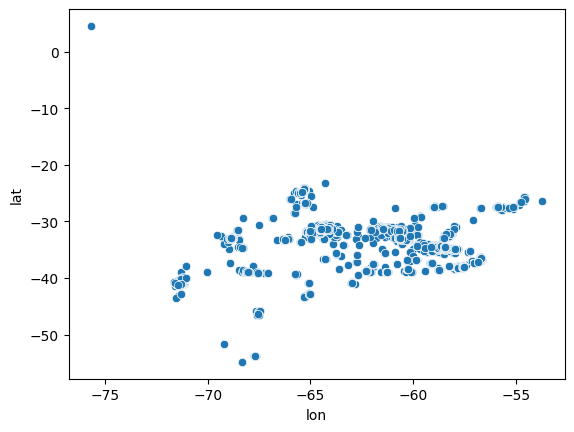

In [32]:
sns.scatterplot(data = data, x="lon", y="lat")

In [33]:
display (data["property_type"].unique())

array(['PH', 'apartment', 'house', 'store'], dtype=object)

In [34]:
display (len(data["property_type"].unique()))

4

<AxesSubplot:xlabel='lon', ylabel='lat'>

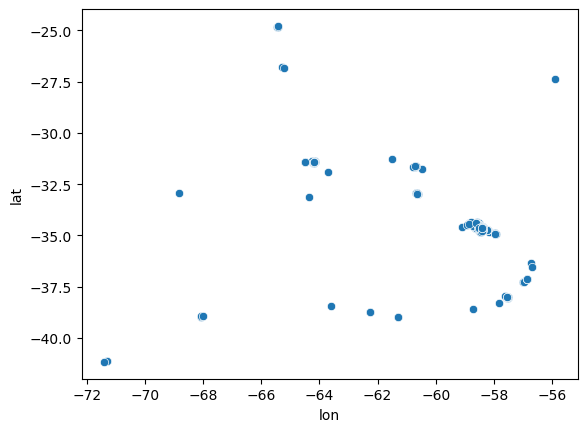

In [35]:
sns.scatterplot(data = data[data["property_type"] == "apartment"].sample(1000), x="lon", y="lat")


In [36]:
display (data.tail(20))


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
121200,121200,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,...,NaN,1680.266800,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cj6z_venta_depart...,UBICACIÓNEstratégicamente ubicado en calle Obi...,Departamento - Nueva Cordoba,NaN
121201,121201,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,...,NaN,1680.266800,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cj70_venta_depart...,UBICACIÓNEstratégicamente ubicado en calle Obi...,Departamento - Nueva Cordoba,NaN
121202,121202,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,...,NaN,1625.348077,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cj71_venta_depart...,UBICACIÓNEstratégicamente ubicado en calle Obi...,Departamento - Nueva Cordoba,NaN
121203,121203,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,...,NaN,1684.753600,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cj72_venta_depart...,UBICACIÓNEstratégicamente ubicado en calle Obi...,Departamento - Nueva Cordoba,NaN
121204,121204,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,...,NaN,1684.753600,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cj73_venta_depart...,UBICACIÓNEstratégicamente ubicado en calle Obi...,Departamento - Nueva Cordoba,NaN
121205,121205,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,...,NaN,1690.362000,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cj74_venta_depart...,UBICACIÓNEstratégicamente ubicado en calle Obi...,Departamento - Nueva Cordoba,NaN
121206,121206,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,...,NaN,1690.362000,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cj75_venta_depart...,UBICACIÓNEstratégicamente ubicado en calle Obi...,Departamento - Nueva Cordoba,NaN
121207,121207,sell,house,Escobar,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|,Argentina,Bs.As. G.B.A. Zona Norte,3434130.0,NaN,NaN,...,178.0,NaN,NaN,NaN,NaN,3000.0,http://www.properati.com.ar/1cj79_venta_casa_e...,Puertos- Barrio Vistas - L. 88Casa en venta so...,"Casa en venta Puertos, barrio Vistas",https://thumbs4.properati.com/6/C8PZ0gwxEBmmj_...
121208,121208,sell,house,Escobar,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|,Argentina,Bs.As. G.B.A. Zona Norte,3434130.0,NaN,NaN,...,178.0,NaN,NaN,NaN,NaN,3000.0,http://www.properati.com.ar/1cj7a_venta_casa_e...,Puertos- Barrio Vistas - L. 88Casa en venta so...,"Casa en venta Puertos, barrio Vistas",https://thumbs4.properati.com/6/C8PZ0gwxEBmmj_...
121209,121209,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,NaN,2611.464968,NaN,NaN,NaN,6300.0,http://www.properati.com.ar/1cj7c_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...


In [37]:
display (data.isna())

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,True,False,False,False,False,False
121216,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,True,True,False,False,False,False
121217,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,False,False,False
121218,False,False,False,False,False,False,False,True,True,True,...,False,False,False,True,True,True,False,False,False,False


In [38]:
display (data.isnull().sum())

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

<AxesSubplot:>

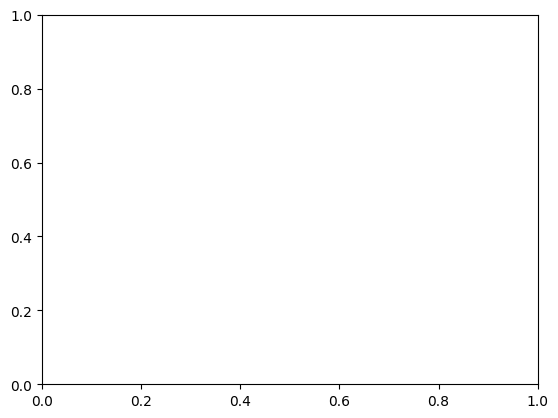

In [40]:
sns.scatterplot(data = data[data['property_type']==3], x="lon", y="lat", hue="property_type")

<AxesSubplot:xlabel='lon', ylabel='lat'>

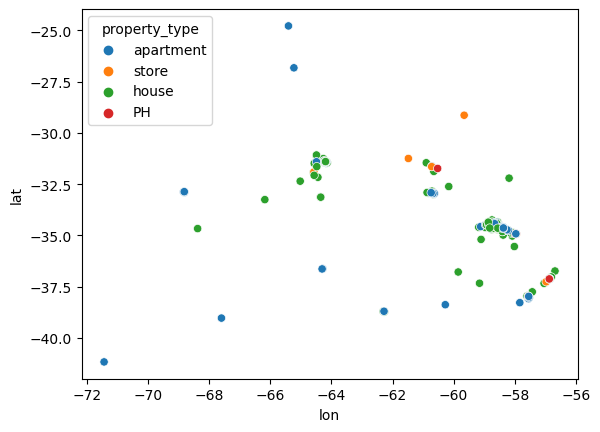

In [41]:
sns.scatterplot(data = data.sample(1000), x="lon", y="lat", hue="property_type")

In [42]:
data.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [43]:
data.index = data["property_type"]
display (data.head())

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
property_type,,,,,,,,,,,,,,,,,,,,,
PH,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
apartment,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
apartment,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
PH,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
apartment,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [61]:
display (data.loc[2])
display (data.iloc[2])
data = data.rename(columns = {'property_type':'Tipos de propriedade'})
data = data.reset_index(drop=False)
display (data.head())

level_0                                                                       2
index                                                                         2
Tipos de propriedade                                                  apartment
Unnamed: 0                                                                    2
operation                                                                  sell
Tipos de propriedade                                                  apartment
place_name                                                            Mataderos
place_with_parent_names                   |Argentina|Capital Federal|Mataderos|
country_name                                                          Argentina
state_name                                                      Capital Federal
geonames_id                                                           3430787.0
lat-lon                                                 -34.6522615,-58.5229825
lat                                     

level_0                                                                       2
index                                                                         2
Tipos de propriedade                                                  apartment
Unnamed: 0                                                                    2
operation                                                                  sell
Tipos de propriedade                                                  apartment
place_name                                                            Mataderos
place_with_parent_names                   |Argentina|Capital Federal|Mataderos|
country_name                                                          Argentina
state_name                                                      Capital Federal
geonames_id                                                           3430787.0
lat-lon                                                 -34.6522615,-58.5229825
lat                                     

ValueError: cannot insert level_0, already exists

In [66]:
# Queremos saber la altura promedio de los arboles de la comuna 3

print (f"El precio del m2 de los apartamentos de la zona de Mataderos es: {data[data['place_name']==3]['surface_covered_in_m2'].mean()}")

# Lo queremos hacer para cad grupo

for precio_m2 in data['place_name'].unique(): # Ver que pasa si no ponemos unique
    print (f"La media de precio/m2 de los apartamentos de la zona de {precio_m2} es: {data[data['place_name']==precio_m2]['surface_covered_in_m2'].mean()}") # Notar que hay un problema si usamos "altura_arbol"

El precio del m2 de los apartamentos de la zona de Mataderos es: nan
La media de precio/m2 de los apartamentos de la zona de Mataderos es: 121.75541795665634
La media de precio/m2 de los apartamentos de la zona de La Plata es: 115.63706763035623
La media de precio/m2 de los apartamentos de la zona de Liniers es: 118.51004016064257
La media de precio/m2 de los apartamentos de la zona de Centro es: 84.2741935483871
La media de precio/m2 de los apartamentos de la zona de Gualeguaychú es: 87.28571428571429
La media de precio/m2 de los apartamentos de la zona de Munro es: 258.8363636363636
La media de precio/m2 de los apartamentos de la zona de Belgrano es: 97.61263157894737
La media de precio/m2 de los apartamentos de la zona de Rosario es: 69.6708410636982
La media de precio/m2 de los apartamentos de la zona de Córdoba es: 135.45553344558397
La media de precio/m2 de los apartamentos de la zona de San Miguel es: 102.57849462365591
La media de precio/m2 de los apartamentos de la zona de Mar

# TODO 
completar análisis de columnas: que columnas hay y que significan cada una.


Analizamos contenido de las columnas que creemos que pueden eliminarse.

In [ ]:
# Columna operation: revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.operation.isnull().sum()}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['operation']).size().reset_index(name='count'))


Cantidad de registros con NaN: 0
Contamos cantidad de registros unicos:
  operation   count
0      sell  121220


Detalle de análisis de columnas:
* `operation` -> Vemos que no tiene NaNs y solo tiene la opción `sell`. Por este motivo la vamos a eliminar.